In [39]:
pip install scikit-learn termcolor plotly imblearn squarify pandas matplotlib seabor matplotlib-ven tqd missingno

ERROR: Could not find a version that satisfies the requirement seabor (from versions: none)
ERROR: No matching distribution found for seabor
You should consider upgrading via the '/Users/ephraim888sun/.pyenv/versions/3.9.6/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [40]:
# Import data processing & analysis packages.

## Data Processing.
import pandas as pd
import numpy as np
import os

## Data Visualisation.
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import plotly.express as px
from matplotlib_venn import venn2

## Machine Learning.

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,classification_report
from tqdm import tqdm
from itertools import cycle
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import feature_selection
import squarify
import imblearn

## Warning indication.
import warnings
warnings.filterwarnings('always') 

In [41]:

# Find data extraction path.

os.getcwd()

'/Users/ephraim888sun/Code/class/spring2024/CS7324/ML7324_Project_1_Income'

Data Understanding

In [42]:
# Import Datasets.

df = pd.read_csv("Train.csv")


# Display the first 5 rows of the train dataset.
df.head(5)

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [43]:
df.describe()


,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
count,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000
mean,34.518728,0.176760,55.433487,23.158850,15.332398,11.321734,1.956067,1.515854,435.926887,36.881737,194.533420,94.499745,1740.888324
std,22.306738,0.555562,276.757327,24.397963,18.049655,14.460839,2.365154,0.850853,4696.359500,270.383302,1956.375501,0.500001,995.559557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,37.870000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1061.290000
50%,33.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1617.040000
75%,50.000000,0.000000,0.000000,52.000000,33.000000,26.000000,4.000000,2.000000,0.000000,0.000000,0.000000,95.000000,2185.480000
max,90.000000,2.000000,9999.000000,52.000000,51.000000,46.000000,6.000000,2.000000,99999.000000,4608.000000,99999.000000,95.000000,18656.300000


In [44]:
print(df.dtypes)
print('===========')
print(df.info())


ID                                 object
age                                 int64
gender                             object
education                          object
class                              object
education_institute                object
marital_status                     object
race                               object
is_hispanic                        object
employment_commitment              object
unemployment_reason                object
employment_stat                     int64
wage_per_hour                       int64
is_labor_union                     object
working_week_per_year               int64
industry_code                       int64
industry_code_main                 object
occupation_code                     int64
occupation_code_main               object
total_employed                      int64
household_stat                     object
household_summary                  object
under_18_family                    object
veterans_admin_questionnaire      

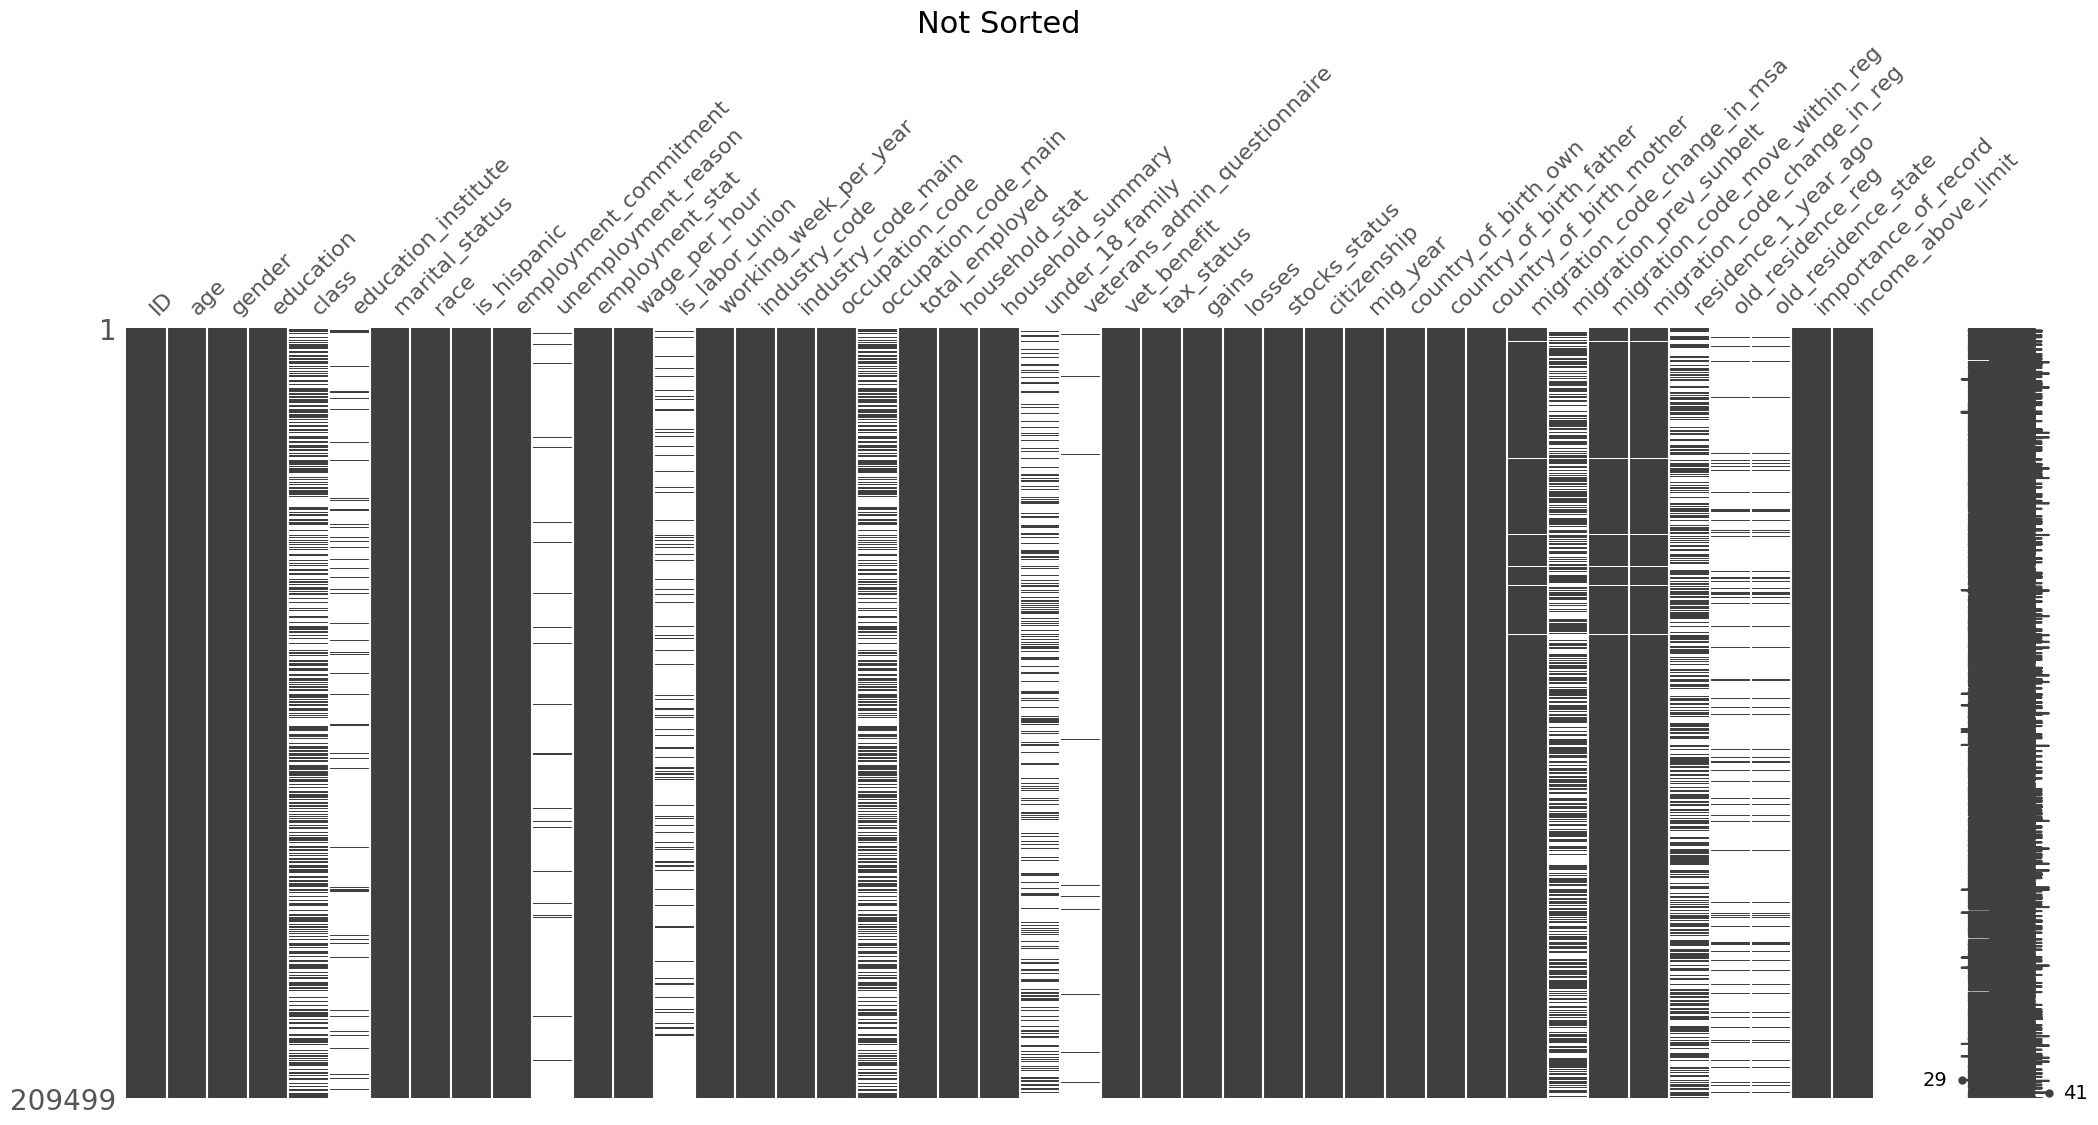

<Figure size 640x480 with 0 Axes>

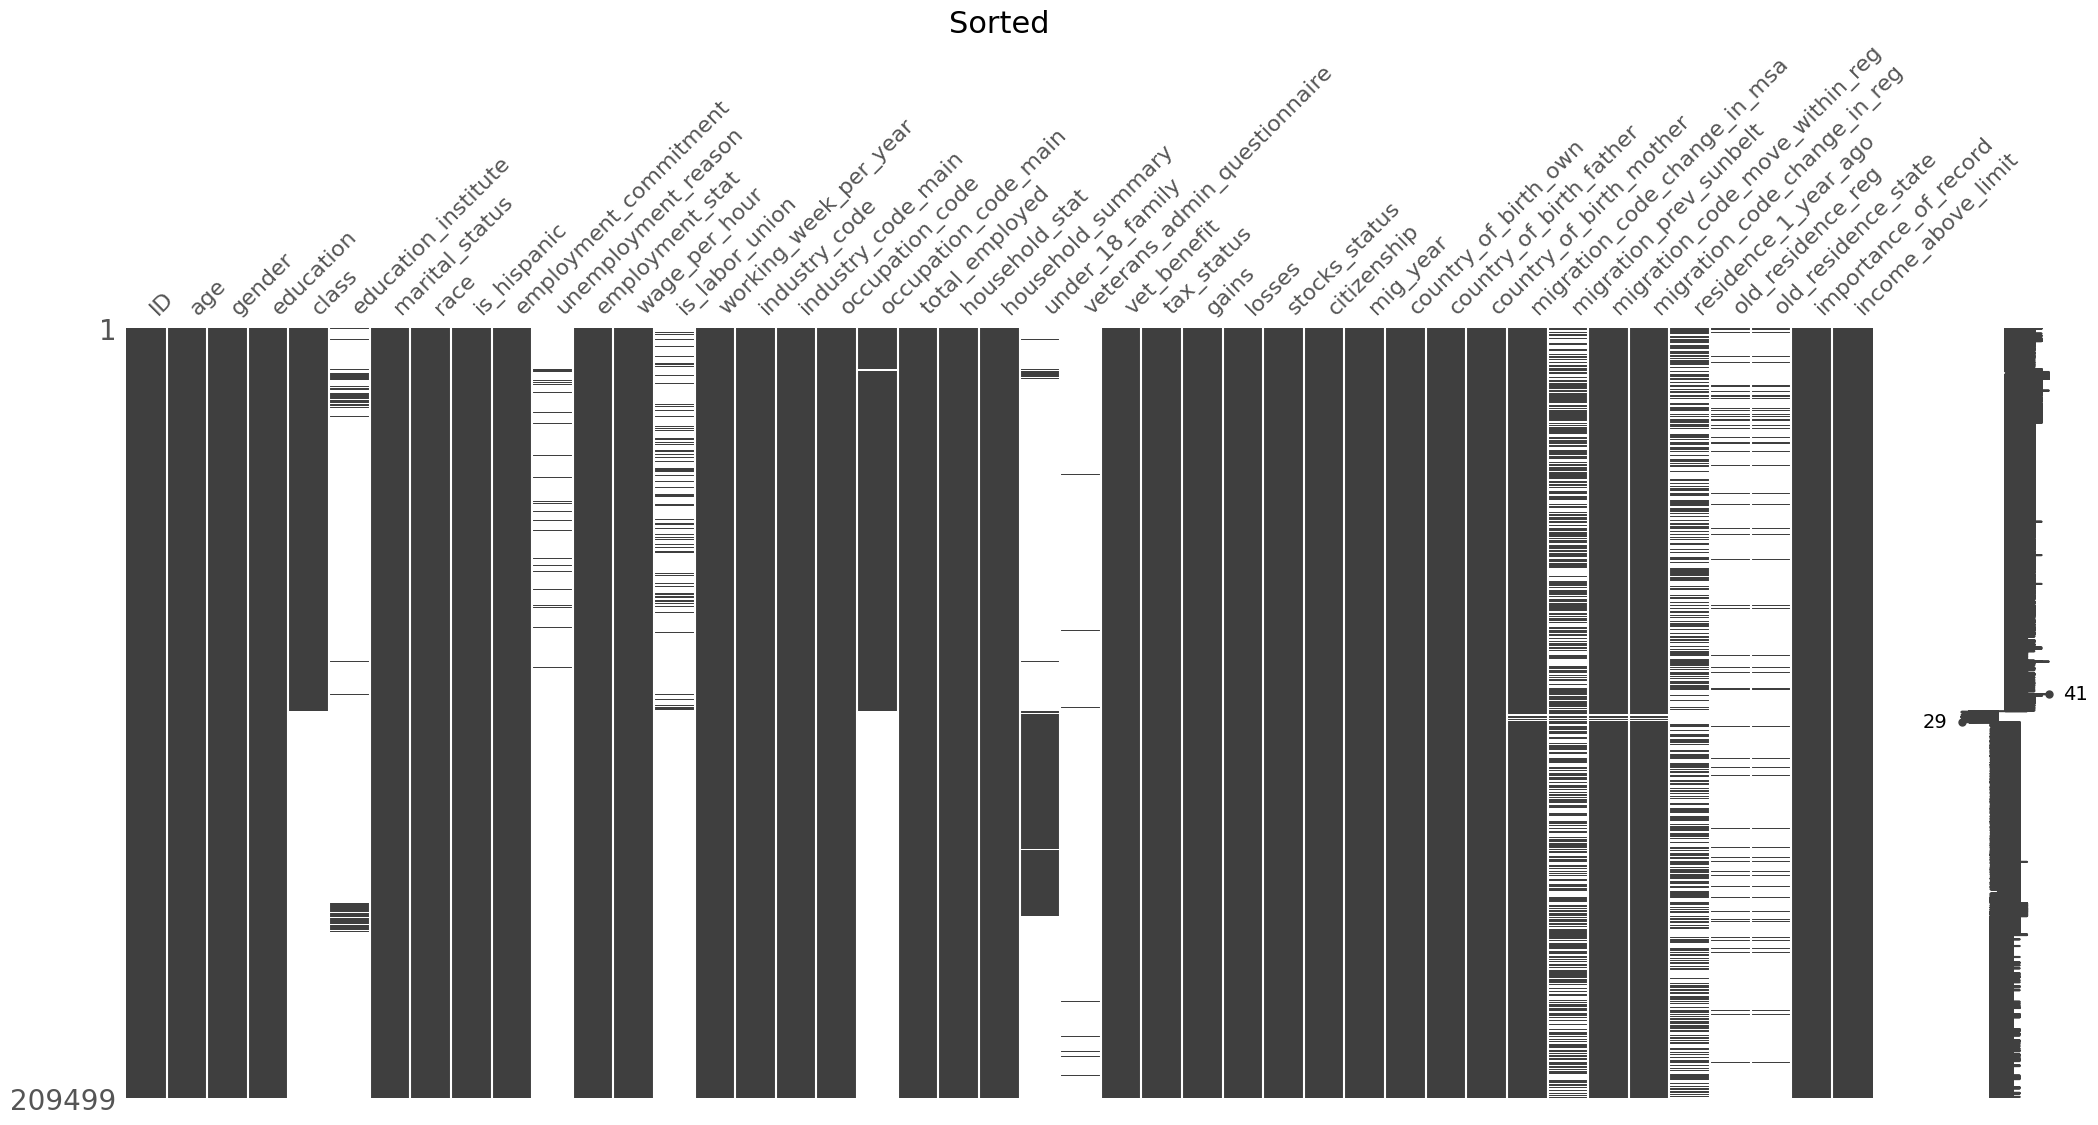

In [45]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

# External package: conda install missingno 
import missingno as mn

mn.matrix(df)
plt.title("Not Sorted",fontsize=22)

plt.figure()
mn.matrix(df.sort_values(by=["class","age"]))
plt.title("Sorted",fontsize=22)
plt.show()

In [54]:
# let's clean the dataset a little before moving on

# 1. Remove attributes that just arent useful for us
for col in ['ID', 'education_institue', 'marital_status', 'is_hispanic', 'unemployment_reason', 'industry_code', 'industry_code_main', 'occupation_code', 'occupation_code_main', 'total_employed', 'household_stat', 'household_summary', 'under_18_family', 'veterans_admin_questionnaire', 'tax_status','gains', 'education_institute', 'employment_stat', 'is_labor_union', 'vet_benefit', 'losses', 'stocks_status', 'mig_year', 'country_of_birth_own',  'country_of_birth_father', 'country_of_birth_mother', 'migration_code_change_in_msa', 'migration_prev_sunbelt', 'migration_code_move_within_reg', 'residence_1_year_ago', 'migration_code_change_in_reg', 'old_residence_reg', 'old_residence_state', 'importance_of_record'  ]:
    if col in df:
        del df[col]
        
# Drop class
df.dropna(inplace=True)


# change gender to male - 1, female - 0
# df['gender'].replace({0:'Female',1:'Male'},inplace=True)
# df['gender'] = np.select(
#     [df['gender'].eq(0), df['gender'].eq(1)], ['Female', 'Male'], default=np.nan
# )

# change income value to binary
df['income_above_limit'].replace(('Above limit', 'Below limit'), (1, 0), inplace=True)




df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104254 entries, 2 to 209498
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   age                    104254 non-null  int64 
 1   gender                 104254 non-null  object
 2   education              104254 non-null  object
 3   class                  104254 non-null  object
 4   race                   104254 non-null  object
 5   employment_commitment  104254 non-null  object
 6   wage_per_hour          104254 non-null  int64 
 7   working_week_per_year  104254 non-null  int64 
 8   citizenship            104254 non-null  object
 9   income_above_limit     104254 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 8.7+ MB


/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_60592/308434212.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['income_above_limit'].replace(('Above limit', 'Below limit'), (1, 0), inplace=True)


In [51]:
df.head(5)

,age,gender,education,class,race,employment_commitment,wage_per_hour,working_week_per_year,citizenship,income_above_limit
2,21,Male,12th grade no diploma,Federal government,Black,Children or Armed Forces,500,15,Native,0
5,45,Male,Bachelors degree(BA AB BS),Private,Asian or Pacific Islander,Children or Armed Forces,825,52,Foreign born- Not a citizen of U S,0
6,53,Male,High school graduate,Private,White,Full-time schedules,0,52,Native,0
7,22,Female,High school graduate,Private,White,Full-time schedules,0,52,Native,0
9,22,Female,11th grade,Private,Black,Full-time schedules,0,48,Native,0


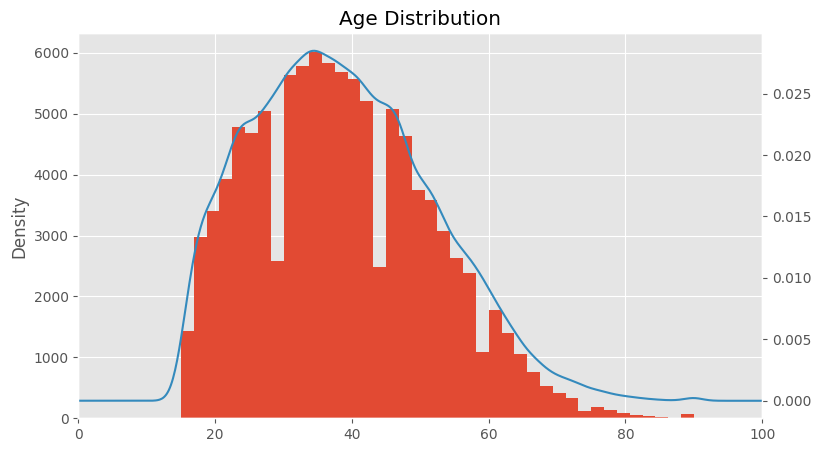

In [48]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(30,5))

plt.subplot(1,3,3)


df['age'].plot.hist(bins=40)
df['age'].plot.kde(bw_method=0.1, secondary_y=True)
plt.xlim(0, 100)
plt.title('Age Distribution')

plt.show()



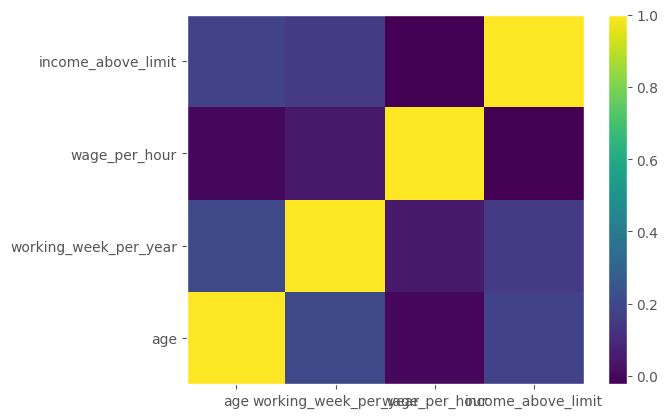

In [55]:
# plot the correlation matrix 
vars_to_use = ['age', 'working_week_per_year', 'wage_per_hour', 'income_above_limit'] # pick vars
plt.pcolor(df[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()

In [60]:
# first group the data
df_grouped = df.groupby(by=['education', 'class'])

# tabulate survival rates of each group
# survival_rate = df_grouped.age.sum() / df_grouped.age.count()

# show in a bar chart using builtin pandas API
ax = df['working_week_per_year'].plot(kind='barh')
plt.title('Survival Percentages by Class and Age Range')
plt.show()
